<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/ComputerVision/02_OpenCV_Crop_and_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np

import matplotlib.pyplot as plt

In [3]:
from google.colab import files
upload_file = files.upload()

Saving profile.jpg to profile.jpg


### Read image

In [51]:
# helper function
def read_image(img_name):
  img = cv2.imread(img_name)
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb_img)
  return rgb_img

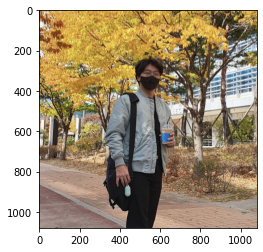

In [52]:
img1 = read_image('profile.jpg')

In [53]:
print(img1.shape) # (height, width, channel)

(1080, 1080, 3)


### Crop image


In [54]:
# indexing
h, w = img1.shape[:2]
size = 720

In [55]:
def center_crop(img, h, w, size=720):
  cropped = img[int(h/2-size/2):int(h/2+size/2), int(w/2-size/2):int(w/2+size/2)]
  return cropped

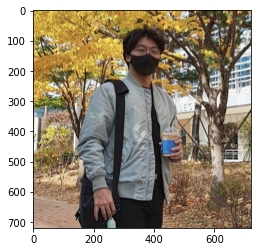

In [56]:
cropped_img1 = center_crop(img1, h, w, size)
plt.imshow(cropped_img1)

### Image masking

In [15]:
from google.colab import files
upload_file = files.upload()

Saving 그룹바이 프로필.png to 그룹바이 프로필.png


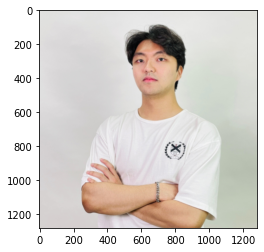

In [57]:
img2 = read_image('그룹바이 프로필.png')

In [58]:
h, w = img2.shape[:2]

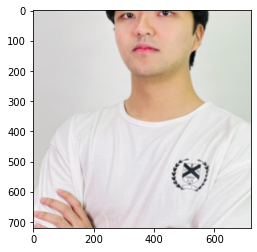

In [59]:
cropped_img2 = center_crop(img2, h, w, size)
plt.imshow(cropped_img2)

In [60]:
img1_masked = np.zeros_like(cropped_img1)
img2_masked = np.zeros_like(cropped_img2)

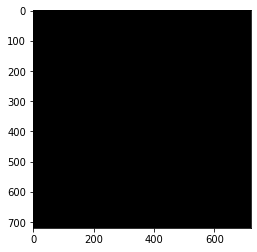

In [61]:
plt.imshow(img1_masked)

In [62]:
img1_masked[int(size/2):,] = cropped_img1[int(size/2):,]
img2_masked[:int(size/2),] = cropped_img2[:int(size/2),]

In [63]:
def show_two_images(img1, img2):
  plt.subplot(1,2,1)
  plt.imshow(img1)

  plt.subplot(1,2,2)
  plt.imshow(img2)

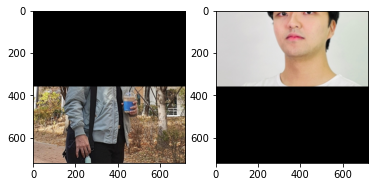

In [64]:
show_two_images(img1_masked, img2_masked)

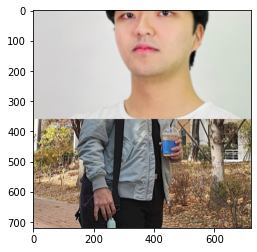

In [65]:
merge = cv2.bitwise_or(img1_masked, img2_masked)
plt.imshow(merge)

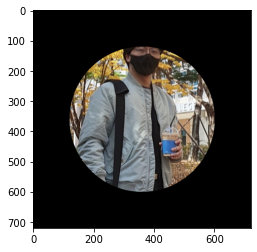

In [66]:
# Circle mask
circle_mask = np.zeros_like(cropped_img1)
cv2.circle(circle_mask, (size//2, size//2), size//3, (255,255,255), -1) # cv2.circle(대상 이미지, (원점x, 원점y), 반지름, (색상), 채우기)

img1_circle_masked = cv2.bitwise_and(cropped_img1, circle_mask)
plt.imshow(img1_circle_masked)

In [68]:
# 이미지 저장
plt.imsave('circle_masked profile.jpg',img1_circle_masked)